$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [38]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/ilay.kamai/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-7 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients


requirements: /home/ilay.kamai/.cache/torch/hub/requirements.txt not found, check failed.


Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


In [40]:
res = model('imgs/DolphinsInTheSky.jpg')
df = res.pandas().xyxy[0]
print(df)

         xmin       ymin        xmax        ymax  confidence  class       name
0  100.278389  47.370995  187.863541  118.462646    0.903491      0     person
1   22.531378  20.887983  128.905197   92.257042    0.500974      0     person
2   85.618011  98.014702  139.018326  124.627907    0.367016     37  surfboard


imgs/DolphinsInTheSky.jpg
         xmin       ymin        xmax        ymax  confidence  class       name
0  100.278389  47.370995  187.863541  118.462646    0.903491      0     person
1   22.531378  20.887983  128.905197   92.257042    0.500974      0     person
2   85.618011  98.014702  139.018326  124.627907    0.367016     37  surfboard
(183, 275, 3) 100.27838897705078 47.370994567871094 187.86354064941406 118.462646484375 0
(183, 275, 3) 22.5313777923584 20.887983322143555 128.9051971435547 92.25704193115234 0
(183, 275, 3) 85.61801147460938 98.01470184326172 139.01832580566406 124.6279067993164 37


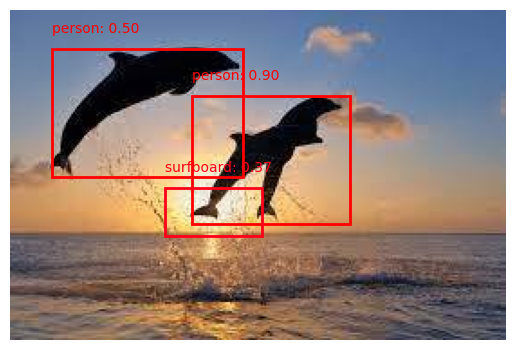

imgs/cat-shiba-inu-2.jpg
         xmin        ymin        xmax        ymax  confidence  class name
0   11.568510  115.774994  312.757050  667.323608    0.655977     15  cat
1  363.715546  290.178497  750.000000  721.983887    0.509417     16  dog
2  311.190796  102.437439  595.031738  687.870728    0.391702     15  cat
(750, 750, 3) 11.568510055541992 115.77499389648438 312.7570495605469 667.3236083984375 15
(750, 750, 3) 363.7155456542969 290.1784973144531 750.0 721.98388671875 16
(750, 750, 3) 311.1907958984375 102.43743896484375 595.03173828125 687.8707275390625 15


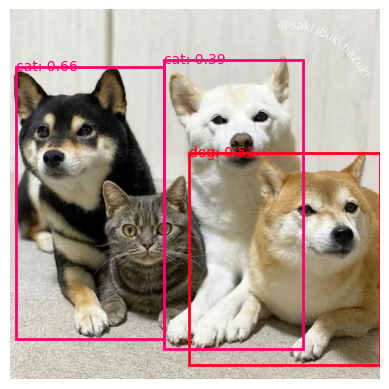

In [51]:
#Insert the inference code here.
import math
import cv2
import numpy as np
# from torch.nn.functional import pad
from matplotlib import pyplot as plt
%matplotlib inline
def plot_boxes(img, df):
    """
    Plot bounding boxes on image
    """
    colors = plt.cm.hsv(np.linspace(0, 1, max(df['class'])+1)).tolist()
    plt.imshow(img)
    plt.axis('off')
    for i in range(len(df)):
        row = df.iloc[i]
        x1,y1,x2,y2 = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        conf = row['confidence']
        name = row['name']
        cls = row['class']
        print(img.shape, x1,y1,x2,y2, cls)
        
#         x1, y1, x2, y2 = df[['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()
#         conf = confs[i]
#         cls = classes[i]
        color = colors[int(cls)]
        label = f"{name}: {conf:.2f}"
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, linewidth=2, edgecolor=color))
        plt.gca().text(x1, y1-15, label,color=color, fontsize=10, ha='left', va='top')

    plt.show()
img1_arr = cv2.imread(img1)[:,:,::-1] 
img2_arr = cv2.imread(img2)[:,:,::-1]
# plt.imshow(img2_arr)
# plt.show()
for im in [img1, img2]:
    print(im)
    with torch.no_grad():
        results = model(im)
        df = results.pandas().xyxy[0]
        print(df)
        im_arr = cv2.imread(im)[:,:,::-1]
        plot_boxes(im_arr, df)


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [ ]:
display_answer(hw2.answers.part6_q1)


## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

In [ ]:
#Insert the inference code here.


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
#insert bonus code here

In [ ]:
display_answer(hw2.answers.part6_bonus)
